<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-con-Python-001/blob/master/IMDB_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB dataset** 
# Algoritmo para predecir las criticas positivas y negativas de películas de IMDB
##  Creado por [M.Sc. Ruben Quispe](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)
### Curso [Machine Learning](https://eie.pe/curso-machine-learning/)

La base de datos IMDB (Internet Movie Database), se compone de 50,000 críticas de películas, donde 25,000 críticas conforman el conjunto de entrenamiento y 25,000 constituyen el conjunto de prueba. En cada conjunto, el 50% de las críticas son positivas y el restante 50% son negativas. Sitio web de IMDB: https://www.imdb.com/<br>
La base de datos IMDB viene precargada en Keras:

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


El argumento num_word=10000, indica que sólo se tomarán en cuenta las 10,000 palabras más usuales dentro de la base de datos, esto con la intención de tener instancias de un tamaño más manejable.

train_data y test_data son listas de críticas, donde cada crítica se compone de valores enteros, los cuales son el índice de alguna palabra en particular. Por su parte, train_labels y test_labels, son listas de 0's y 1's, donde 0 representa que la crítica es negativa y 1 que es positiva.

In [2]:
train_data[20000]

[1,
 6,
 185,
 255,
 2478,
 39,
 4,
 2,
 15,
 59,
 9,
 6,
 1985,
 448,
 725,
 6,
 223,
 1795,
 7,
 35,
 2,
 3612,
 7,
 5,
 556,
 18,
 9781,
 112,
 31,
 688,
 8,
 41,
 501,
 2199,
 34,
 349,
 59,
 4136,
 4,
 4281,
 2,
 5,
 880,
 4,
 349,
 59,
 892,
 1454,
 11,
 119,
 19,
 6,
 243,
 132,
 41,
 113,
 739,
 8,
 193,
 6,
 471,
 18,
 4,
 128,
 54,
 59,
 9,
 3540,
 5,
 41,
 1461,
 9,
 556,
 34,
 6,
 1143,
 7,
 3959,
 9266,
 174,
 34,
 134,
 2484,
 687,
 4,
 255,
 1747,
 8,
 41,
 1115,
 771,
 5,
 4846,
 1060,
 23,
 4,
 3959,
 1793,
 8,
 4,
 288,
 2,
 3935,
 10,
 10,
 2,
 2,
 2,
 1080,
 2,
 2,
 778,
 19,
 368,
 6073,
 2,
 2,
 837,
 34,
 2,
 1976,
 2,
 2,
 37,
 17,
 2,
 2,
 2,
 2251,
 59,
 9,
 6,
 1985,
 4,
 2,
 173,
 9,
 54,
 4,
 370,
 4110,
 978,
 968,
 200,
 41,
 2977,
 4,
 636,
 2763,
 2672,
 41,
 8557,
 2,
 16,
 242,
 6,
 2,
 1664,
 1563,
 2,
 9,
 472,
 24,
 6,
 1985,
 59,
 9,
 1533,
 6,
 55,
 565,
 7472,
 10,
 10,
 17,
 6,
 22,
 1985,
 255,
 11,
 631,
 62,
 28,
 77,
 128,
 48,
 2,
 109,
 6

In [3]:
len(train_data[1786]) 

113

In [4]:
train_labels[3] #La crítica 51 del conjunto de entrenamiento es negativa.

1

Dado que establecimos la restricción de utilizar solamente las 10,000 palabras más usuales, ninguno de los índices que constituyen cada crítica, puede tener un valor mayor a 10,000:

In [5]:
max([max(sequence) for sequence in train_data])

9999

El código siguiente permite decodificar las críticas:

In [6]:
#word_index es un diccionario que permite mapear cada palabra a su respectivo índice
word_index = imdb.get_word_index()
# Aplicamos la operación inversa, es decir, mapeamos de índices a palabras.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #dict significa dictionary, y te devuelve una lista de tuplas pares, donde
#el primer valor de la lista, representa la clave o ID, y el segundo valor denota el valor de dicha clave.
# Procedemos a decodificar la crítica. La razón por la que a cada índice le restamos 3, es
#porque 0, 1 y 2 son índices reservados para los valores de "padding", "comienzo de la secuencia" y "desconocido".
# El argumento "?" se regresa en caso de que el índice en cuestión no tenga asociado ninguna palabra.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[15678]])

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? as much as i have enjoyed the hanzo the razor movies three is definitely enough ? got the gold ' the final adventure for the japanese ? with the impressive package is a fairly enjoyable piece of ? cinema but offers little new in terms of ideas whilst taking a big step backwards as far as ? is concerned br br the film opens with the appearance of a female ghost and looks as though it is going to explore supernatural territory something which might have taken the series in an interesting new direction unfortunately after the ? turns out to be nothing but a scooby doo style ? ? up by a corrupt ? official keen to keep people away from the lake where he is hiding stolen gold director ? ? is content to ? familiar elements from the first two films the result being a rather stale affair br br once again hanzo heads an investigation that requires him to ? women through the use of his mighty penis slice up his enemies and abuse his superiors on the way we get wild ? good natured rape hanzo fo

# **Preprocesamiento de los datos**

Aplicamos el enfoque de one-hot encoding a los datos de entrada. Por ejemplo, si una de nuestras instancias se representa por la lista [2, 7, 15], al aplicar one-hot encoding, dicha lista se convertirá en un vector de 10,000 elementos, donde a los índices 2, 7 y 15, se les asignará el valor de 1. En el problema que estamos abordando, todas las listas de críticas se transforman en vectores de 10,000 elementos, debido a que el número máximo de palabras que se están considerando, son 10,000. <br>
La razón por la que se aplica esta operación en los datos de entrada, es porque las redes neuronales convolucionales no reciben como entrada listas de valores, sino tensores.<br>
Ejemplo:

**Crítica -> [2, 7, 15]** <br>
**One-hot encoding de la crítica -> [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ... , 0]** <br>
**Crítica -> [9, 7, 1, 2, 7]** <br>
**One-hot encoding de la crítica -> [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ... , 0]**

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000): #sequences se refiere al conjunto de críticas
    # Creamos matrices de ceros con dimensiones (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension)) #-> 25,000 X 10,000
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # le asignamos el valor de uno al índice correspondiente
    return results

# Conjunto de entrenamiento vectorizado/one-hote encoding
x_train = vectorize_sequences(train_data)
# Conjunto de prueba vectorizado/one-hote encoding
x_test = vectorize_sequences(test_data)

In [9]:
x_train[23976]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
len(x_train[12])

10000

In [11]:
x_train[1].shape

(10000,)

In [12]:
x_train.shape

(25000, 10000)

In [13]:
x_train[15879]

array([0., 1., 1., ..., 0., 0., 0.])

También convertimos las etiquetas en tensores:

In [14]:
# Etiquetas vectorizadas
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
y_train[9]

0.0

# **Construcción de la red neuronal**

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #Capa oculta 1 - input_shape puede verse como una representación implícita de la capa de entrada
model.add(layers.Dense(16, activation='relu'))# Capa oculta 2
model.add(layers.Dense(1, activation='sigmoid'))#Capa de salida

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# **Compilación**

In [18]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), #Es una variación del descenso de gradiente
              loss='binary_crossentropy', #Se relaciona a la función de error 
              metrics=['accuracy'])

# **Validación**

Buscando evaluar el rendimiento del modelo durante la fase de entrenamiento, construimos el conjunto de validación a partir del conjunto de entrenamiento.

In [19]:
#Instancias
x_val = x_train[:10000] #Instancias de validación
#x_val = x_train[0:10000]
partial_x_train = x_train[10000:] #Instancias de entrenamiento
#partial_x_train = x_train[10000:25000] #Instancias de entrenamiento

#Etiquetas
y_val = y_train[:10000] #Etiquetas de validación  
#y_val = y_train[0:10000] #Etiquetas de validación  
partial_y_train = y_train[10000:] #Etiquetas de entrenamiento
#partial_y_train = y_train[10000:25000] #Etiquetas de entrenamiento

In [20]:
#Conjunto de entrenamiento
len(partial_x_train)

15000

In [21]:
#Conjunto de validación
len(x_val)

10000

# **Entrenamiento**

In [22]:
epochs_num = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs_num,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.5109 - accuracy: 0.7839 - val_loss: 0.4084 - val_accuracy: 0.8431
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2980 - accuracy: 0.9015 - val_loss: 0.3122 - val_accuracy: 0.8800
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2160 - accuracy: 0.9289 - val_loss: 0.2754 - val_accuracy: 0.8928
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1709 - accuracy: 0.9445 - val_loss: 0.2776 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1398 - accuracy: 0.9545 - val_loss: 0.2940 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1145 - accuracy: 0.9636 - val_loss: 0.3155 - val_accuracy: 0.8795
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0977 - accuracy: 0.9705 - val_loss: 0.3123 - val_accuracy: 0.8838
Epoch 8/20
30

Podemos ver que la llamada al método fit(), genera un objeto History, el cual tiene un miembro history, que a su vez es un diccionario que contiene información acerca de todo el proceso de entrenamiento.

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Graficamos el desempeño de la red neuronal durante la fase de entrenamiento. A continuación se muestra la comparación entre la pérdida que ocurre en el conjunto de entrenamiento y la pérdida relacionada al conjunto de validación. 

Best accuracy epoch  3
Best loss epoch  3


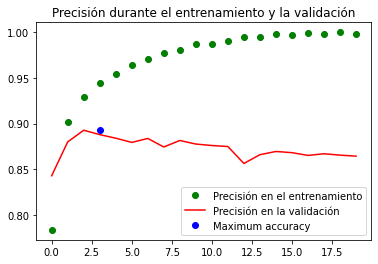

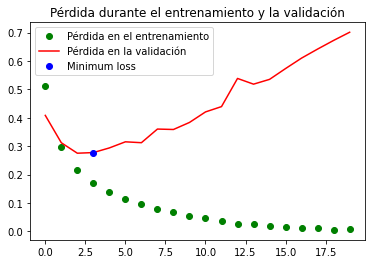

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

#Precisión
plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print('Best accuracy epoch ', max_val_acc_epoch)
plt.figure()

#Pérdida
plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Best loss epoch ', min_val_loss_epoch)

plt.show()

Con base a las gráficas previas, podemos observar que, aproximadamente a partir de la época 4, el modelo deja de mejorar y comienza a presentarse una disminución en su rendimiento.

# **Overfitting - Sobreajuste:**<br>
Esto ocurre cuando el desempeño del modelo en el conjunto de entrenamiento es superior al rendimiento del mismo modelo en el conjunto de validación.<br>
Para mitigar el overfitting, debemos buscar que el rendimiento del modelo tanto en el conjunto de entrenamiento como en el conjunto de validación, sea similar y con valores apropiados.

# **Re-entrenamiento y evaluación del modelo final** 

Una vez que se seleccionó el modelo tomando como base el rendimiento de este en el conjunto de validación, una práctica recomendada es volver a entrar la arquitectura con los mismos parámetros con los que se generó el modelo seleccionado y con el conjunto de entrenamiento original, es decir, integrado el conjunto de validación al conjunto de entrenamiento "parcial". 

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo en el conjunto de entrenamiento original
model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 1s 25ms/step - loss: 0.4687 - accuracy: 0.8194
Epoch 2/5
49/49 [==============================] - 1s 24ms/step - loss: 0.2720 - accuracy: 0.9064
Epoch 3/5
49/49 [==============================] - 1s 24ms/step - loss: 0.2060 - accuracy: 0.9270
Epoch 4/5
49/49 [==============================] - 1s 25ms/step - loss: 0.1742 - accuracy: 0.9380
Epoch 5/5
49/49 [==============================] - 1s 24ms/step - loss: 0.1485 - accuracy: 0.9487


In [26]:
#Evaluamos el modelo final
loss_test, acc_test = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3155 - accuracy: 0.8773


In [27]:
print(loss_test, acc_test)

0.31554871797561646 0.8773199915885925


# **Predicciones del modelo final**

Luego de generar un modelo apropiado para clasificar críticas, podemos usarlo para predecir la probabilidad de que cada nueva crítica que sea leída por el modelo, se clasifique como positiva o negativa. Este proceso predictivo es muy importante, ya que así es como se desplegaría esta red neuronal en "la vida real", es decir, en algún servicio de consumo.

In [28]:
model.predict(x_test)

array([[0.24245262],
       [0.999631  ],
       [0.9650076 ],
       ...,
       [0.1443555 ],
       [0.10413879],
       [0.772051  ]], dtype=float32)

In [29]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

**NOTA:** La información presentada en este notebook, fue tomada de https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb. La única variación sutil del presente notebook con respecto a la fuente original, tiene que ver con la descripción de ciertas partes del código.